# Exercício sobre o gradiente descendente

### Neste notebook, exploraremos a função de erro - em particular, a função do erro quadrático médio (MSE) para um problema de regressão. Também treinaremos um modelo básico de Machine Learning usando o Gradiente Descente para ajustar uma função hipótese aos nossos dados e, consequentemente, minimizar o erro

#### Instruções

1. Antes de começar, você deve clicar na opção "Copiar para o Drive" na barra superior do Colab. Depois de clicar nela, verifique se você está trabalhando nessa versão do notebook para que seu trabalho seja salvo.
2. Quando você terminar o exercício, vá ao menu do Colab e selecione a opção para fazer download do notebook.
    * Os notebooks têm extensão .ipynb.
    * Este deve ser o arquivo que você irá entregar.
    * Para baixá-lo, vá até a opção **File** -> **Download .ipynb**.
3. Após o download do notebook, vá até a aba de tarefas do MS Teams, localize a tarefa referente a este laboratório e faça o upload do seu notebook. Veja que há uma opção de anexar arquivos à tarefa.
4. Não se esqueça de colocar seu **nome** na célula de texto abaixo.

**Nome**:

## 1.Explorando o erro

Nesta seção, definimos um problema de regressão linear da forma $\hat{y} = a_0 + a_1 x$. Geramos o conjunto de dados que usaremos para encontrar a relação entre x e y, ou seja, chegar aos valores ótimos de $a_0$ e $a_1$.



---

**Pergunta 1**: Diz-se que na regressão linear, tentamos encontrar a função que melhor se ajusta aos dados. Você consegue pensar o por quê disso?

**Resposta:**

---



Abaixo, importamos duas bibliotecas -


1.   [math](https://docs.python.org/3/library/math.html) - operações matemáticas básicas, e.g.: raíz quadrada, potência, etc.
2.   [matplotlib](https://matplotlib.org/) - visualização de dados
3.   [numpy](https://numpy.org/) - manipulação de arrays

In [60]:
# importando as bibliotecas que serão usadas.
import math
import matplotlib.pyplot as plt
import numpy as np

A célula abaixo calcula os valores $\hat{y}$ preditos para palpites de $a_0$ e $a_1$. Altere os valores dos dois pesos e explore como a saída da função hipótese e, consequentemente, o erro mudam para diferentes pesos.

---

**Pergunta 2**: Informe o erro para três valores diferentes de $a_0$ e $a_1$. (Execute as três células de código abaixo para cada par de valores)

**Resposta:**

1.   $a_0$ = , $a_1$ = , MSE =
2.   $a_0$ = , $a_1$ = , MSE =
3.   $a_0$ = , $a_1$ = , MSE =

---

In [61]:
# Edite os pesps a0 e a1 para obter valores de erro diferentes.
# Execute esta célula novamente quando terminar de definir os novos pesos.
# Seu y será calculado como y = ao + a1*x, então
# se a0 = -1 e a1 = 3, então y = -1 + 3x

a0 = -1 # < Coloque um valor aqui >
a1 = 2  # < Coloque um valor aqui >

x = np.array([-1, 0, 1, 2, 3, 4])
y = np.array([-3, -1, 1, 3, 5, 7])      # Valores esperados (rótulos) for a0 = -1 e a1 = 2, i.e, y = -1 + 2x

y_hat = np.zeros((len(y), ))
for i, xi in enumerate(x):
  y_hat[i] = a0 + a1*xi                 # Predições feitas com base nos valores definidos para os pesos.

print("y: " + str(y))
print("y_hat: " + str(y_hat))

y: [-3 -1  1  3  5  7]
y_hat: [-3. -1.  1.  3.  5.  7.]


Antes de prosseguirmos para o cálculo do erro, vamos visualizar a diferença entre os valores esperados e preditos. No gráfico de dispersão abaixo, os *pontos azuis* representam os valores esperados, os *pontos verdes* representam os valores preditos e as *linhas tracejadas vermelhas* representam a diferença entre os dois para cada amostra de dados individual.

Você pode ler mais sobre gráficos de dispersão da biblioteca matplotlib [aqui](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html).

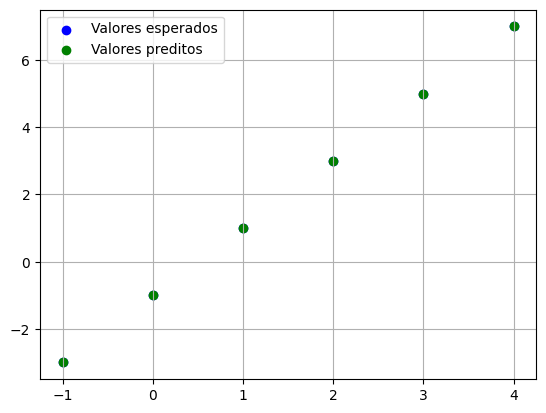

In [62]:
# Visualização do erro entre os valores esperados e preditos pela função hipótese.
plt.scatter(x, y, color='blue', label='Valores esperados')                    # valores esperados
plt.scatter(x, y_hat, color='green', label='Valores preditos')                # valores preditos
plt.vlines(x, ymin=np.minimum(y, y_hat), ymax=np.maximum(y, y_hat), color="red", linestyle='--', alpha=0.3)
plt.legend()
plt.grid()
plt.show()

Nós poderíamos simplesmente pegar a média das diferenças entre os os valores esperados e preditos para calcular o erro do modelo. No entanto, a presença de erros negativos faria com que alguns erros se cancelassem, não dando uma representação precisa do erro total. Portanto, a coisa mais inteligente a fazer aqui é elevar ao quadrado cada valor de erro individual e calcular a média de todos os erros individuais, ou seja, calcular o **MSE**.

In [63]:
# Vamos calcular o erro.
mse = 0
N = len(y) # Número total de amostras.
for i in range(0, N):
  squared_diff = (y[i] - y_hat[i]) ** 2
  mse += squared_diff

# Divide pelo número total de amostras.
mse /= N

print("MSE: " + str((mse)))

MSE: 0.0


## 2. Minimizando o erro

Nesta seção, iremos minimizar o erro do nosso modelo de regressão, treinando-o com os dados fornecidos.

Nós importamos a seguinte biblioteca -


1.   [tensorflow](https://www.tensorflow.org/) - biblioteca de código aberto para criar e treinar modelos de ML.

In [64]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


Para treinar nosso modelo de regressão linear, precisamos primeiro definir (i) o modelo, (ii) a função de erro e (iii) o procedimento (i.e., algoritmo) de treinamento.

### Modelo de regressão linear

O modelo representa a função hipótese $\hat{y} = a_0 + a_1 x$. Portanto, o modelo gera um valor de $\hat{y}$ para determinados $a_0$, $a_1$ e x quando é chamado.

In [65]:
# Definindo nosso palpite inicial.
A0_INICIAL = 10.0
A1_INICIAL = 10.0

# Define nosso modelo de regressão.
class Model(object):
  def __init__(self):
    # Inicializando os pesos como variáveis do Tensorflow.
    self.a0 = tf.Variable(A0_INICIAL)
    self.a1 = tf.Variable(A1_INICIAL)

  # O método call é chamado toda a vez que passamos um valor de x para o modelo.
  def __call__(self, x):
    return self.a0 + self.a1*x

***Dica:*** Dado uma valor de x, o método `__call__()` retorna um valor de $\hat{y}$. Sabemos que o melhor formato para a função hipótese, ou seja, o modelo, é $\hat{y} = a_0 + a_1 x$. Portanto, o método `__call__()` retorna `self.a0 + self.a1 * x`.

### Função de erro

Em seguida, definimos nossa função de erro, que irá retornar o erro quadrático médio (MSE).

A função do Tensorflow `tf.reduce_mean()` calcula a média do tensor (i.e., vetor/array) de entrada. Leia mais [aqui](https://www.tensorflow.org/api_docs/python/tf/math/reduce_mean).

No caso do código abaixo, a função `tf.reduce_mean()` calcula a média dos erros individuais.

In [66]:
# Definindo nossa função de erro.
def erro(predicted_y, target_y):
  return tf.reduce_mean(tf.square(predicted_y - target_y))

### Procedimento (algoritmo) de treinamento

Aqui, o algoritmo do gradiente descendente é usado para o treinamento do modelo.

Definimos uma função chamada `train` que executa uma iteração do **gradiente descendente** usando **todas** as amostras em nosso conjunto de dados (ou seja, usa todos os valores x e y disponíveis para treinamento).

Uma iteração do algoritmo de otimização do gradiente descendente envolve:

1. o cálculo do erro
2. o cálculo das derivadas da função de erro em relação ao pesos individuais (i.e., $a_0$ e $a_1$)
3. a atualização dos pesos do modelo com as derivadas calculadas (i.e., vetor gradiente)

**API Gradient Tape do TensorFlow** -

O cálculo das derivadas parciais da função de erro em relação aos pesos é feito automaticamente por um objeto da classe `GradientTape()` do TensorFlow.

Você pode aprender mais sobre a classe `GradientTape()` em https://www.tensorflow.org/api_docs/python/tf/GradientTape

In [67]:
# Definindo o processo de treinamento (ou atualização dos pesos)
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    # Erro atual.
    current_error = erro(model(inputs), outputs)

    # Aqui é onde diferenciamos a função de erro em relação aos pesos do modelo.
    da0, da1 = t.gradient(current_error, [model.a0, model.a1])      # derro/da0, derro/da1

    # E aqui é onde atualizamos os pesos do modelo com base no passo de aprendizagem escolhido.
    model.a0.assign_sub(learning_rate * da0)   # model.a0 = model.a0 - learning_rate*a0
    model.a1.assign_sub(learning_rate * da1)   # model.a1 = model.a1 - learning_rate*a1

    # Retorna o erro atual.
    return current_error

---


**Pergunta 3**: No código acima, antes de treinar o modelo, quais são as três coisas que precisamos definir?

**Resposta:**

---

---

**Pergunta 4**: Qual versão do gradiente descendente está implentada no código acima?

**Resposta:**

---

### Treinando o modelo

Agora que definimos todas as funções individuais que vamos precisar, é hora de juntá-las.

Primeiro definimos o conjunto de dados (x e y) e, em seguida, instanciamos nosso modelo. Na sequência, treinamos nosso modelo por várias épocas. Para cada época, calculamos e armazenamos os valores dos pesos ($a_0$ e $a_1$) e o erro.

Observe a diminuição do erro à medida que as épocas passam.

In [68]:
# Definindo o conjunto de dados e o passo de aprendizagem.
x = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0])
y = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0])

# Passo de aprendizagem.
LEARNING_RATE = 0.005

# Número de épocas.
epochs = 50

# Instancia o modelo.
model = Model()

# Coletando o histórico de valores a0 e a1 para plotar mais tarde.
list_a0, list_a1 = [], []
erros = []

# Laço (loop) de treinamento.
for epoch in range(epochs):

  # Armazena os valores dos pesos.
  list_a0.append(model.a0.numpy())
  list_a1.append(model.a1.numpy())

  # Iteração de treinamento.
  current_error = train(model, x, y, learning_rate=LEARNING_RATE)

  # Armzena os erros ao longo das épocas de treinamento.
  erros.append(current_error)

  # Imprime os erros ao longo das épocas de treinamento.
  print('Epoch %2d: w=%1.2f b=%1.2f, loss=%2.5f' % (epoch, list_a0[-1], list_a1[-1], current_error))

Epoch  0: w=10.00 b=10.00, loss=715.66669
Epoch  1: w=9.77 b=9.42, loss=640.37299
Epoch  2: w=9.55 b=8.88, loss=573.31366
Epoch  3: w=9.34 b=8.36, loss=513.58490
Epoch  4: w=9.14 b=7.88, loss=460.38223
Epoch  5: w=8.95 b=7.42, loss=412.98914
Epoch  6: w=8.77 b=6.99, loss=370.76804
Epoch  7: w=8.60 b=6.59, loss=333.15128
Epoch  8: w=8.44 b=6.21, loss=299.63358
Epoch  9: w=8.28 b=5.85, loss=269.76511
Epoch 10: w=8.13 b=5.51, loss=243.14545
Epoch 11: w=7.98 b=5.19, loss=219.41809
Epoch 12: w=7.85 b=4.89, loss=198.26579
Epoch 13: w=7.71 b=4.61, loss=179.40607
Epoch 14: w=7.59 b=4.35, loss=162.58748
Epoch 15: w=7.47 b=4.10, loss=147.58614
Epoch 16: w=7.35 b=3.86, loss=134.20280
Epoch 17: w=7.24 b=3.64, loss=122.26014
Epoch 18: w=7.13 b=3.43, loss=111.60019
Epoch 19: w=7.03 b=3.23, loss=102.08240
Epoch 20: w=6.93 b=3.05, loss=93.58163
Epoch 21: w=6.84 b=2.88, loss=85.98649
Epoch 22: w=6.74 b=2.71, loss=79.19780
Epoch 23: w=6.66 b=2.56, loss=73.12731
Epoch 24: w=6.57 b=2.42, loss=67.69640
Epo

### Plote os valores dos pesos ao longo das épocas de treinamento.

Abaixo está um gráfico dos valores dos pesos do modelo $a_0$ e $a_1$ (eixo y) ao longo das épocas (eixo x). À medida que o modelo é treinado, observe como os valores de $a_0$ e $a_1$ convergem para os valores verdadeiros 1.0 e 2.0, respectivamente.

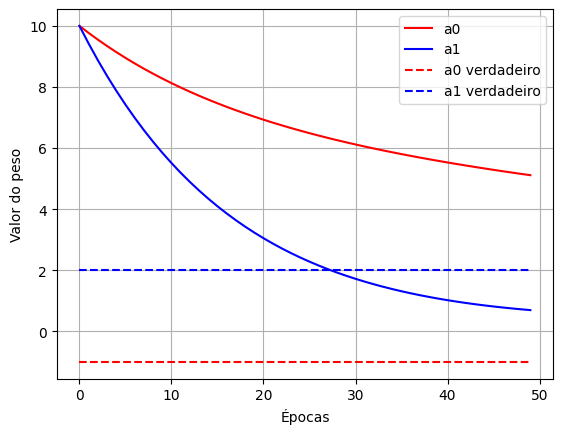

In [69]:
# Plote os valores de a0 e a1 para cada época de treinamento em relação aos valores verdadeiros.
TRUE_a0 = -1.0
TRUE_a1 = 2.0

xaxis = range(epochs)
plt.plot(xaxis, list_a0, 'r', xaxis, list_a1, 'b')
plt.plot([TRUE_a0] * epochs, 'r--', [TRUE_a1] * epochs, 'b--')
plt.legend(['a0', 'a1', 'a0 verdadeiro', 'a1 verdadeiro'])
plt.xlabel('Épocas')
plt.ylabel('Valor do peso')
plt.grid()
plt.show()

---

**Pergunta 5**: No gráfico acima, o que significam as linhas sólidas e as pontilhadas?

**Resposta:**

---

### Plote o MSE ao longo das épocas de treinamento

O gráfico abaixo mostra o MSE ao longo do treinamento do modelo.

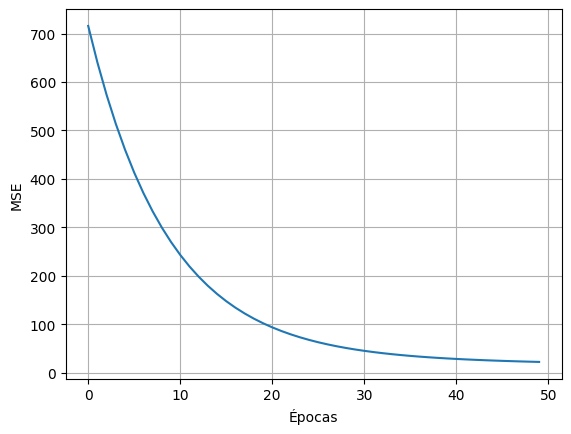

In [70]:
plt.plot(range(epochs), erros)
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.grid()
plt.show()

---

**Pergunta 6**: O que você conclui sobre os resultados anteriores? Os pesos do modelo estão próximos dos valores verdadeiros após as 50 épocas de treinamento? Caso não, o que pode ser feito para melhorar isso? Descreva todas as possíveis formas e implemente uma delas. Cite qual delas será implementada.

**Resposta:**

---

---

**Pergunta 7**: O que ocorreria se o passo de aprendizagem fosse feito igual a 1?

**Resposta:**

---